In [1]:
#IMPORT LIBARIES NEEDED TO EXECUTE THE PROGRAM PROPERLY

import numpy as np # linear algebra
#IMPORT PANDAS FOR DATA PROCESSING
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf  
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
#PREPARING DATA
data = pd.read_csv('Assignment_Spam.csv',encoding='latin-1')

In [3]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":'label', "v2":'text'})
#print(data.head())
tags = data["label"]
texts = data["text"]

In [4]:
#LABELLING OF 0 AND 1 FOR CLASSIFICATION
data['label'].unique()
label = {'spam': 1,'ham': 0}
data['label'].replace(label, inplace=True)

In [5]:
# SEPERATING SETS AND TAGS
training_size = int(len(texts) * 0.8 )

training_texts = texts[0:training_size]
testing_texts = texts[training_size:]
training_tags = tags[0:training_size]
testing_tags = tags[training_size:]

In [6]:
#LABELLING OF NUMPY ARRAYS
training_tags_final = np.array(training_tags)
testing_tags_final = np.array(testing_tags) 

In [7]:
#DATA SETS FOR TOKENIZING
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_texts)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_texts)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [8]:
#Modelling of the program
model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), tf.keras.layers.Flatten(), tf.keras.layers.Dense(6, activation='relu'), tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           16000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 6)                 9606      
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [9]:
#TESTING THE NUMBER OF EPOCHS
num_epochs = 45
history = model.fit(padded, training_tags_final, epochs=num_epochs, validation_data=(testing_padded, testing_tags_final))

Epoch 1/45
140/140 [==============================] - 1s 4ms/step - loss: 0.4014 - accuracy: 0.8564 - val_loss: 0.2237 - val_accuracy: 0.8700
Epoch 2/45
140/140 [==============================] - 0s 2ms/step - loss: 0.1850 - accuracy: 0.8647 - val_loss: 0.1560 - val_accuracy: 0.8700
Epoch 3/45
140/140 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.9659 - val_loss: 0.1364 - val_accuracy: 0.9731
Epoch 4/45
140/140 [==============================] - 0s 2ms/step - loss: 0.1270 - accuracy: 0.9782 - val_loss: 0.1247 - val_accuracy: 0.9803
Epoch 5/45
140/140 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9859 - val_loss: 0.0554 - val_accuracy: 0.9812
Epoch 6/45
140/140 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9912 - val_loss: 0.0509 - val_accuracy: 0.9830
Epoch 7/45
140/140 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9921 - val_loss: 0.0517 - val_accuracy: 0.9839
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


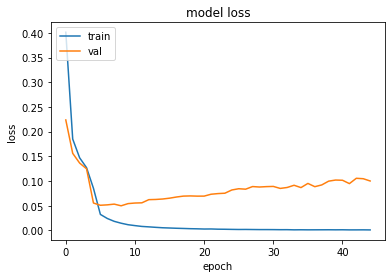

In [20]:
#SUMMARIZATION OF ACCURACY
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
#DATA READING OPENING OF CSV OUPUT
data = pd.read_csv('Assignment_Output.csv',encoding='latin-1')

In [27]:
data = data.rename(columns={"ï»¿":'labels', "text":'texts'})
data.head()

,labels,texts
0,1,Feel Yourself That You Are Always Happy.. Slow...
1,2,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2,3,Send me yetty's number pls.
3,4,Hey so this sat are we going for the intro pil...
4,5,I got it before the new year cos yetunde said ...


In [28]:
#PRINT MESSAGES FOR CHECKING
messages = data['texts'].astype(str)
print(messages)


0     Feel Yourself That You Are Always Happy.. Slow...
1     staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2                           Send me yetty's number pls.
3     Hey so this sat are we going for the intro pil...
4     I got it before the new year cos yetunde said ...
5     Hey we can go jazz power yoga hip hop kb and y...
6     Hey mate. Spoke to the mag people. Weâ°ÃÃ·re...
7                                Morning only i can ok.
8                                  Wat time Ã_ finish?
9                 Shant disturb u anymore... Jia you...
10    4mths half price Orange line rental & latest c...
11    Your opinion about me? 1. Over 2. Jada 3. Kusr...
12    MOON has come to color your dreams, STARS to m...
13    You are a winner U have been specially selecte...
14    Unless it's a situation where YOU GO GURL woul...
15    Awww dat is sweet! We can think of something t...
16                              Bring tat cd don forget
17    Single line with a big meaning::::: \Miss 

In [30]:
# MAKING AND CREATING A SEQUENCES
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(messages)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)     

classes = model.predict(fakes_padded)


In [31]:
#PRINTING OUTPUT
for x in range(len(messages)):
  print(messages[x])
  print(classes[x])
  print('\n')

Feel Yourself That You Are Always Happy.. Slowly It Becomes Your Habit &amp; Finally It Becomes Part Of Your Life.. Follow It.. Happy Morning &amp; Have A Happy Day:)
[3.6171854e-11]


staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
[0.00271049]


Send me yetty's number pls.
[0.00011249]


Hey so this sat are we going for the intro pilates only? Or the kickboxing too? 
[4.1715352e-06]


I got it before the new year cos yetunde said she wanted to surprise you with it but when i didnt see money i returned it mid january before the  &lt;#&gt; day return period ended.
[1.1028147e-08]


Hey we can go jazz power yoga hip hop kb and yogasana 
[7.618884e-06]


Hey mate. Spoke to the mag people. Weâ°ÃÃ·re on.  the is deliver by the end of the month. Deliver on the 24th sept. Talk later. 
[1.1565215e-06]


Morning only i can ok.
[6.459843e-07]


Wat time Ã_ finish?
[7.445236e-05]


Shant disturb u anymore... Jia you...
[0.00018714]


4mths half price Orange line rental & latest camera phone